In the following project I have tried to answer some industry use cases. 
We will analyze a dataset with Sales figures across various segements and categories. 
Original table is at the order level. It will be interesting to summarize the measures
by columns like year and state to compare how the company is performing across various matrix.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/Jay/Downloads/Sales Report.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,8/11/2020,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,8/11/2020,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/6/2020,16/6/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Changing the datatype for Order Date and Ship Date to datetime datatype from object datatype.
data["Ship Date"] = pd.to_datetime(data["Ship Date"])
data["Order Date"] = pd.to_datetime(data["Order Date"])

📊 Sales & Profitability

1. What are the total sales and profit over time? Also, study the trend in profit margin.

In [11]:
#First we will have to create a new column for order date to show order years
data['Order Year'] = data["Order Date"].dt.year

In [19]:
#Let's bring all the columns we need
sales_profit = data.groupby('Order Year')[["Sales", "Profit"]].sum().sort_values(by = "Order Year", ascending = False)
sales_profit["Profit Margin"] = (sales_profit["Profit"]/sales_profit["Sales"]).round(4)*100
sales_profit

,Sales,Profit,Profit Margin
Order Year,,,
2021,733215.2552,93439.2696,12.74
2020,609205.5980,81795.1743,13.43
2019,470532.5090,61618.6037,13.10
2018,484247.4981,49543.9741,10.23


From the above table we can see the Sales and Profit has gone up between 2018 and 2021. 
However, if we see the profit margin, it has stayed the same since 2019.
Sales and Profit has grown by same proportion. 

-------------------------------------------------------------------------------------------------------------------

2. Which categories generate the highest/lowest profit?

In [74]:
#To find out the answer we will have to get the total profit by categories to compare
profit_by_category = data.groupby('Category')["Profit"].sum().round(2).reset_index()

"""
Once we have total profit by category let's create 
a column that compares each value with Minimum and maximum profits and assigns those value as a new column.
"""

profit_by_category["Lowest Profit"] = profit_by_category["Profit"].min()
profit_by_category["Highest Profit"] = profit_by_category["Profit"].max()

#For value in each row in Profit column let's create a function that would look 
#for a condition and assign a value to each row accordingly.

def compare(profit_by_category):
    if profit_by_category["Lowest Profit"] == profit_by_category["Profit"]:
        return "Lowest"
    elif profit_by_category["Highest Profit"] == profit_by_category["Profit"]:
        return "Highest"
    else:
        return ""

# Let's create a new column that would compare Profit column with lowest and highest column and will populate a value.
profit_by_category["Profit Compare"] = profit_by_category.apply(compare, axis = 1)

#Finally we will drop columns that we don't need anymore.
profit_by_category.drop(["Lowest Profit", "Highest Profit"], axis =1, inplace = True)

profit_by_category.sort_values(by = "Profit", ascending = False)

,Category,Profit,Profit Compare
2,Technology,145454.95,Highest
1,Office Supplies,122490.80,
0,Furniture,18451.27,Lowest


Profit from Technology is the highest, while profit from products in Furniture is at the lowest.

-------------------------------------------------------------------------------------------------------------------

3. How do discounts impact profitability? (e.g., “Is there a point where higher discounts reduce profit?”)

In [95]:
data["Discount Amount"] = data["Discount"]*data["Sales"]
discount_profit = data.groupby("Order Year")[["Discount Amount", "Profit", "Sales"]].sum().round(2).reset_index()
discount_profit

,Order Year,Discount Amount,Profit,Sales
0,2018,77556.80,49543.97,484247.50
1,2019,62861.19,61618.60,470532.51
2,2020,80911.57,81795.17,609205.60
3,2021,101252.59,93439.27,733215.26


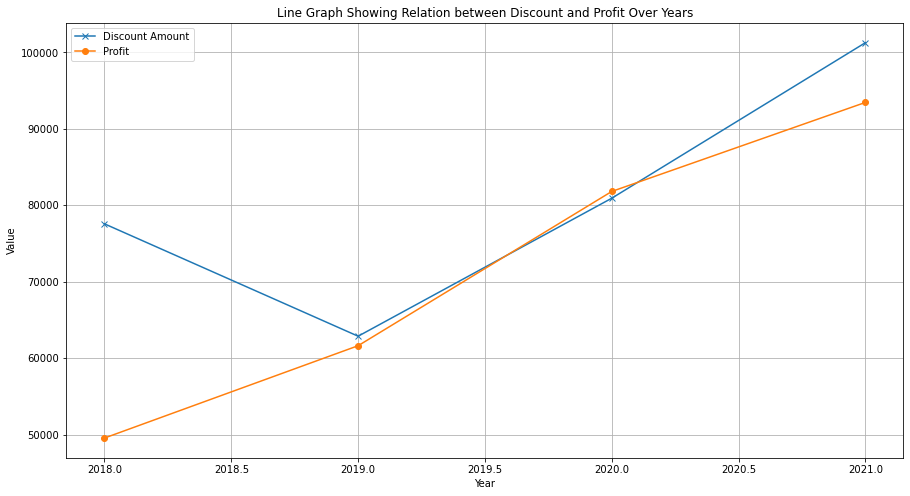

In [93]:
plt.figure(figsize = (15, 8))
plt.plot(discount_profit["Order Year"], discount_profit["Discount Amount"], label = "Discount Amount", marker = "x")
plt.plot(discount_profit["Order Year"], discount_profit["Profit"], label = "Profit", marker = 'o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph Showing Relation between Discount and Profit Over Years')
plt.legend() # Display the legend to identify the lines
plt.grid(True) # Optional: add a grid
plt.show()

Here, we can see that Profit and Discount has gone up for most of the years except from 2018 to 2019.
That year discount has gone down still the profit has gone up. Due to that year's result 
I cannot for sure say that there is a positive correlation between discount and profit i.e. if discount goes up, profit goes up.
However, recent year has seen higher profits. is it due to higher discount? We will have to analyze more to get an answer. Few way to do that could be get data for more years, compare the correlation by categories.

-------------------------------------------------------------------------------------------------------------------

4. What’s the profit margin by region, state, or city?

In [138]:
#We will need total profit and Sales by state
total_by_state = data.groupby("State")[["Profit", "Sales"]].sum().reset_index().round(2)
total_by_state["Profit Margin"] = (total_by_state["Profit"]/ total_by_state["Sales"]).round(2)*100
tot = total_by_state.sort_values(by = "Profit Margin", ascending = False)
tot.head() #shows the top 5 state with highest profit margin

,State,Profit,Sales,Profit Margin
7,District of Columbia,1059.59,2865.02,37.0
21,Minnesota,10823.19,29863.15,36.0
6,Delaware,9977.37,27451.07,36.0
17,Maine,454.49,1270.53,36.0
2,Arkansas,4008.69,11678.13,34.0


In [132]:
tot.tail() #shows the bottom 5 state with lowest profit margin

,State,Profit,Sales,Profit Margin
41,Texas,-25729.36,170188.05,-15.0
11,Illinois,-12607.89,80166.10,-16.0
40,Tennessee,-5341.69,30661.87,-17.0
4,Colorado,-6527.86,32108.12,-20.0
33,Ohio,-16971.38,78258.14,-22.0


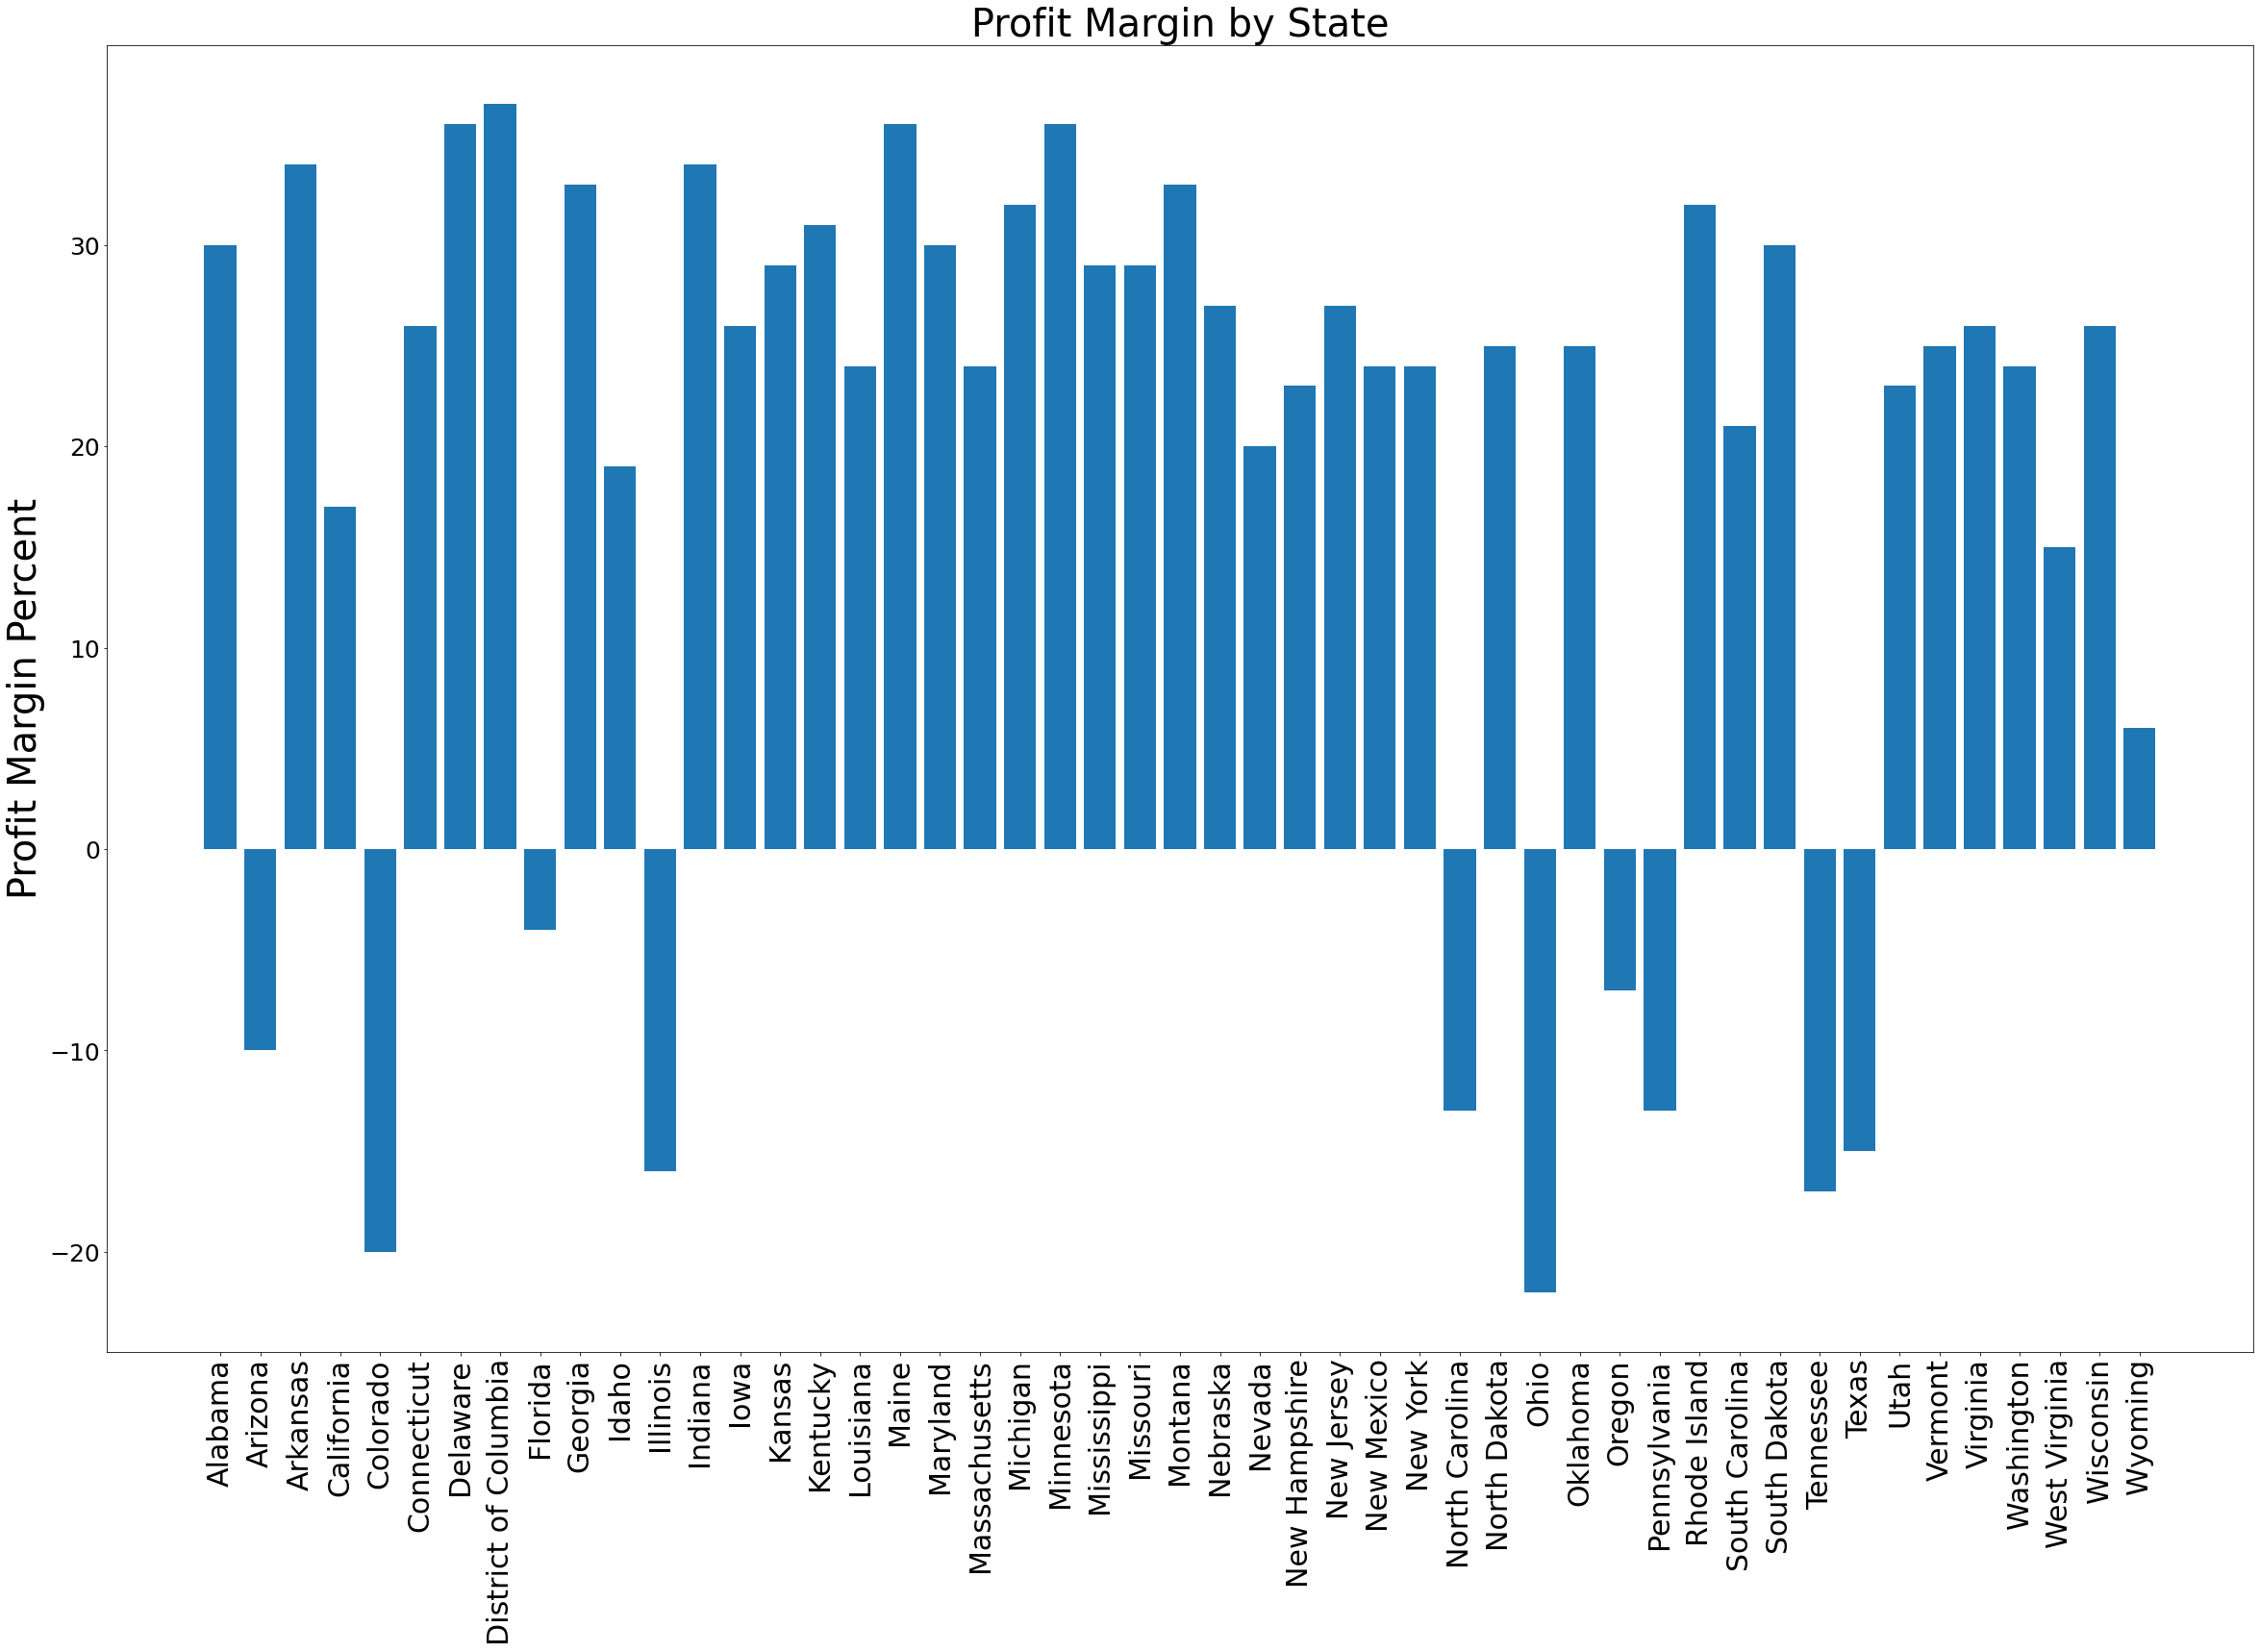

In [130]:
#We will plot a barchart to show profit margin by state.
fig, ax = plt.subplots(figsize = (40, 25))
ax.bar(total_by_state["State"], total_by_state["Profit Margin"])
ax.tick_params(axis = "x", labelrotation = 90, labelsize  =30)
ax.tick_params(axis = 'y', labelsize = 25)
ax.set_ylabel("Profit Margin Percent", fontsize = 40)
ax.set_title("Profit Margin by State", fontsize = 40)
plt.show()

From the table and barchart above we can see the DC has 
the highest profit margin while Ohio has the lowest amongst all the states.

-------------------------------------------------------------------------------------------------------------------

👥 Customer & Segment Analysis


1. How do different customer segments (Consumer, Corporate, Home Office) perform in terms of sales and profit?

In [157]:
tot_by_segment = data.groupby('Segment')[["Sales", "Profit"]].sum().reset_index().round(2)
tot_by_segment

,Segment,Sales,Profit
0,Consumer,1161401.34,134119.21
1,Corporate,706146.37,91979.13
2,Home Office,429653.15,60298.68


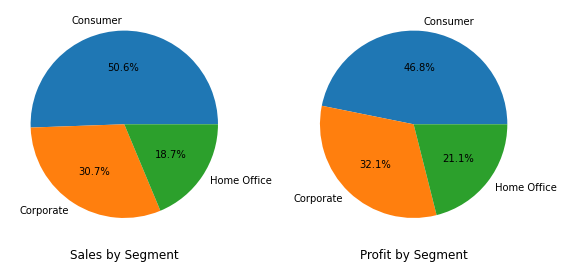

In [166]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
ax1.pie(tot_by_segment["Sales"], labels = tot_by_segment["Segment"], autopct='%1.1f%%')
ax2.pie(tot_by_segment["Profit"], labels = tot_by_segment["Segment"], autopct='%1.1f%%')
ax1.set_title("Sales by Segment", loc = "center", y= -0.1)
ax2.set_title("Profit by Segment", loc = "center", y= -0.1)
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

Profit and Sales from consumer segment is the highest about 46.8% and 50.6% respectively. 
Little over half of Sales comes from Consumer, while sales from Home Office is the lowest.

-------------------------------------------------------------------------------------------------------------------


2. What’s the average order size per customer segment?


In [ ]:
# First we will have to get average order size. Which is total Sales by total quantity.
#We want this value for each segment.

In [173]:
avg_by_segment = data.groupby("Segment")[["Sales", "Quantity"]].sum().round(2).reset_index()
#To get average we will have to create a new column
avg_by_segment["Average Order"] = (avg_by_segment["Sales"]/avg_by_segment["Quantity"]).round(2)
avg_by_segment.sort_values(by = "Average Order", ascending = False)

,Segment,Sales,Quantity,Average Order
2,Home Office,429653.15,6744,63.71
1,Corporate,706146.37,11608,60.83
0,Consumer,1161401.34,19521,59.49


Home Office has been the segment that has maximum average order size. 
On an average for wach order customers have ordered around 64 quantities.

3. Which customers generate high sales but low profit (potential discount overuse)?

In [180]:
discount_overuse = data[["Customer ID", "Customer Name", "Segment", "City", "Sales", "Quantity", "Discount", "Profit"]]
discount_overuse.head()

,Customer ID,Customer Name,Segment,City,Sales,Quantity,Discount,Profit
0,CG-12520,Claire Gute,Consumer,Henderson,261.9600,2,0.00,41.9136
1,CG-12520,Claire Gute,Consumer,Henderson,731.9400,3,0.00,219.5820
2,DV-13045,Darrin Van Huff,Corporate,Los Angeles,14.6200,2,0.00,6.8714
3,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,957.5775,5,0.45,-383.0310
4,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,22.3680,2,0.20,2.5164


In [194]:
discount_overuse.sort_values(by = ["Sales", "Profit"], ascending = (False, True)).head(10)

,Customer ID,Customer Name,Segment,City,Sales,Quantity,Discount,Profit
2697,SM-20320,Sean Miller,Home Office,Jacksonville,22638.480,6,0.5,-1811.0784
6826,TC-20980,Tamara Chand,Corporate,Lafayette,17499.950,5,0.0,8399.9760
8153,RB-19360,Raymond Buch,Consumer,Seattle,13999.960,4,0.0,6719.9808
2623,TA-21385,Tom Ashbrook,Home Office,New York City,11199.968,4,0.2,3919.9888
4190,HL-15040,Hunter Lopez,Consumer,Newark,10499.970,3,0.0,5039.9856
9039,AB-10105,Adrian Barton,Consumer,Detroit,9892.740,13,0.0,4946.3700
4098,SC-20095,Sanjit Chand,Consumer,Minneapolis,9449.950,5,0.0,4630.4755
4277,BS-11365,Bill Shonely,Corporate,Lakewood,9099.930,7,0.0,2365.9818
8488,SE-20110,Sanjit Engle,Consumer,Arlington,8749.950,5,0.0,2799.9840
6425,CC-12370,Christopher Conant,Consumer,Philadelphia,8399.976,4,0.4,1119.9968


For Customer ID SM-20320, first row in the above output, we have Sales of $22,628.5. 
However, we are making loss of $1811.07 on this order. This is due to overuse of discount. 
Company should have given a lower discount to break even or make some profit on this order.